In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

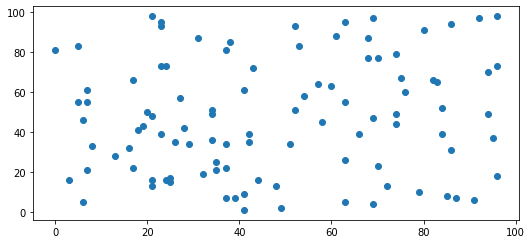

In [55]:
df = pd.DataFrame()
X = []
Y = []
output = []
for _ in range(100):
    # 100 random points from 0 to 100
    x = np.random.randint(0,100)
    y = np.random.randint(0,100)
    o = np.random.randint(0,2)
    X.append(x)
    Y.append(y)
    output.append(o)

df['X'] = X
df['Y'] = Y
df['output'] = output

plt.scatter(X, Y)
plt.show()

In [56]:
df.head()

,X,Y,output
0,84,52,1
1,48,13,1
2,83,65,0
3,29,34,0
4,70,77,1


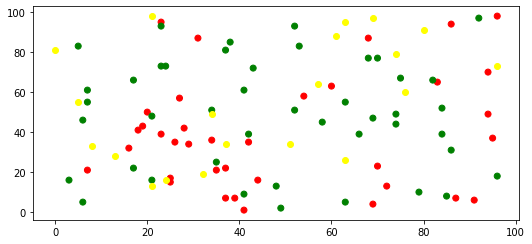

In [57]:
k = 5
split = int(len(X) * .80)
train_X = X[:split]
train_Y = Y[:split]
train_output = output[:split]
train_color = ['red' if l == 0 else 'green' for l in train_output]
# print(train_output)

test_X = X[split:]
test_Y = Y[split:]
test_output = output[split:]

plt.scatter(train_X, train_Y, color=train_color)
plt.scatter(test_X, test_Y, color='yellow')
# plt.legend(loc='top left')
plt.show()

In [58]:
classify_output = []

for i in range(len(test_X)):
    x = test_X[i]
    y = test_Y[i]
    distance = []

    for j in range(len(train_X)):
        x1 = train_X[j]
        y1 = train_Y[j]
        val = train_output[j]
        dist = math.sqrt((x-x1)*(x-x1) + (y-y1)*(y-y1))
        distance.append((j, dist, val))
    
    distance.sort(key = lambda x : x[1])
    knn = distance[:k]
    # print(knn)

    true_count = 0
    for l in range(k):
        if knn[l][2] == 1:
            true_count += 1
    # print(true_count)
    if true_count >= int(k/2):
        classify_output.append((x, y, True))
    else:
        classify_output.append((x, y, False))

classify_output


[(63, 26, True),
 (57, 64, True),
 (96, 73, False),
 (69, 97, True),
 (21, 13, False),
 (61, 88, True),
 (80, 91, False),
 (21, 98, True),
 (32, 19, False),
 (0, 81, True),
 (34, 49, False),
 (76, 60, True),
 (37, 34, False),
 (51, 34, True),
 (5, 55, True),
 (24, 16, False),
 (8, 33, False),
 (63, 95, True),
 (13, 28, False),
 (74, 79, True)]

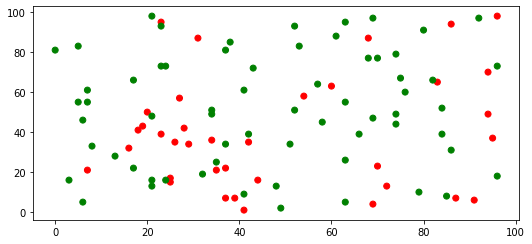

In [59]:
test_color = ['red' if l == 0 else 'green' for l in classify_output]
plt.scatter(train_X, train_Y, color=train_color)
plt.scatter(test_X, test_Y, color=test_color)
plt.show()